In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import concat
from pandas import merge
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1、导入数据

In [3]:
# 导入数据, 上级目录的平行目录要用..
df = pd.read_csv('..\\JN_DataWarehouse\\stock_analysis\\002572.csv')
df.head()

,日期,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值
0,2020-04-22,'002572,索菲亚,19.33,19.39,18.91,19.18,19.19,0.14,0.7295,0.5712,5211539,9.995219e+07,1.763611e+10,1.763611e+10
1,2020-04-21,'002572,索菲亚,19.19,19.57,19.07,19.54,19.75,-0.56,-2.8354,0.8665,7905661,1.523504e+08,1.750838e+10,1.750838e+10
2,2020-04-20,'002572,索菲亚,19.75,19.88,19.18,19.39,19.21,0.54,2.811,0.9080,8283991,1.622289e+08,1.801931e+10,1.801931e+10
3,2020-04-17,'002572,索菲亚,19.21,19.68,19.12,19.40,19.10,0.11,0.5759,1.0886,9931739,1.922523e+08,1.752663e+10,1.752663e+10
4,2020-04-16,'002572,索菲亚,19.10,19.29,18.61,18.76,18.86,0.24,1.2725,0.9970,9096367,1.732171e+08,1.742627e+10,1.742627e+10


# 2 异常数据处理

## 2.1 重复值处理

In [3]:
# 查看总行数
df.shape

(2200, 15)

In [4]:
# 检查重复值
df.duplicated().sum()

0

In [5]:
#显示重复值的数据
df[df.duplicated()]

,日期,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值


In [6]:
# 删除表中的重复值的数据
df.drop_duplicates(inplace=True)

In [7]:
# 检查去掉的重复值
df.duplicated().sum()

0

In [8]:
# 查看总行数，去掉重复后，行数会变化
df.shape

(2200, 15)

In [9]:
# 重新排序，重新索引
df.index=range(df.shape[0])

In [10]:
df.index
print(df.head())

           日期     股票代码   名称    收盘价    最高价    最低价    开盘价    前收盘    涨跌额  \
0  2020-04-22  '002572  索菲亚  19.33  19.39  18.91  19.18  19.19   0.14   
1  2020-04-21  '002572  索菲亚  19.19  19.57  19.07  19.54  19.75  -0.56   
2  2020-04-20  '002572  索菲亚  19.75  19.88  19.18  19.39  19.21   0.54   
3  2020-04-17  '002572  索菲亚  19.21  19.68  19.12  19.40  19.10   0.11   
4  2020-04-16  '002572  索菲亚  19.10  19.29  18.61  18.76  18.86   0.24   

       涨跌幅     换手率      成交量          成交金额           总市值          流通市值  
0   0.7295  0.5712  5211539  9.995219e+07  1.763611e+10  1.763611e+10  
1  -2.8354  0.8665  7905661  1.523504e+08  1.750838e+10  1.750838e+10  
2    2.811  0.9080  8283991  1.622289e+08  1.801931e+10  1.801931e+10  
3   0.5759  1.0886  9931739  1.922523e+08  1.752663e+10  1.752663e+10  
4   1.2725  0.9970  9096367  1.732171e+08  1.742627e+10  1.742627e+10  


## 2.2 异常值处理

In [11]:
# 查看异常数据,只对数值型有效
df.describe().T

,count,mean,std,min,25%,50%,75%,max
收盘价,2200.0,3.232845e+01,1.684100e+01,0.000000e+00,1.896000e+01,2.907000e+01,3.950000e+01,9.558000e+01
最高价,2200.0,3.289129e+01,1.705227e+01,0.000000e+00,1.929750e+01,2.981500e+01,4.010000e+01,9.640000e+01
最低价,2200.0,3.167669e+01,1.657688e+01,0.000000e+00,1.863500e+01,2.830000e+01,3.879250e+01,9.240000e+01
开盘价,2200.0,3.224806e+01,1.677745e+01,0.000000e+00,1.890000e+01,2.900500e+01,3.940250e+01,9.610000e+01
前收盘,2200.0,3.302051e+01,1.648287e+01,1.259000e+01,1.913000e+01,3.034000e+01,3.976250e+01,9.558000e+01
换手率,2200.0,9.759081e-01,1.013202e+00,0.000000e+00,4.306500e-01,7.240500e-01,1.213150e+00,2.418320e+01
成交量,2200.0,3.904983e+06,4.950260e+06,0.000000e+00,7.798160e+05,2.234624e+06,5.208802e+06,5.038777e+07
成交金额,2200.0,1.068184e+08,1.150548e+08,0.000000e+00,1.937400e+07,7.520961e+07,1.550786e+08,1.010527e+09
总市值,2200.0,1.597709e+10,1.018043e+10,3.108350e+09,6.855190e+09,1.604590e+10,2.324724e+10,3.924562e+10
流通市值,2200.0,1.432245e+10,1.140213e+10,0.000000e+00,1.702080e+09,1.589288e+10,2.247158e+10,3.924562e+10


In [12]:
# 案例1 假设收盘价有某行值偏离异常（过大或过小），只可以使用本公式发现
sta=(df['收盘价']-df['收盘价'].mean())/df['收盘价'].std()
df[sta.abs()>4]

,日期,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值


In [13]:
# 案例2
df[df.收盘价 > df.最高价]

,日期,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值


In [14]:
#合并 案例1 和 案例2 查看异常数据
pd.concat([df[df.收盘价 > df.最高价],df[sta.abs()>4]])

,日期,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值


In [15]:
# 删除异常数据
delindex=pd.concat([df[df.收盘价 > df.最高价],df[sta.abs()>4]]).index
df.drop(delindex,inplace=True)

In [16]:
#查看是否有删除数据，如有要重做索引
df.shape

(2200, 15)

## 2.3 缺失值，None值处理

In [17]:
# 检验空值 isnull() , notnull()
df.isnull().sum()

日期      0
股票代码    0
名称      0
收盘价     0
最高价     0
最低价     0
开盘价     0
前收盘     0
涨跌额     0
涨跌幅     0
换手率     0
成交量     0
成交金额    0
总市值     0
流通市值    0
dtype: int64

In [18]:
# 缺失值筛查
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_pct = 100 * mis_val/len(df)
    mis_val_table = pd.concat([mis_val, mis_val_pct], axis=1)
    mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'}, inplace=True)
    mis_val_table = mis_val_table[mis_val_table.iloc[:, 1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    return mis_val_table
missing_loan = missing_values_table(df)
missing_loan

,Missing Values,% of Total Values


In [19]:
# 检查是否含有None
#df.groupby(['涨跌额'])['涨跌额'].count()

df.loc[df.涨跌幅=='None','涨跌幅'] =0
df.loc[df.涨跌额=='None','涨跌额'] =0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2200 entries, 0 to 2199
Data columns (total 15 columns):
日期      2200 non-null object
股票代码    2200 non-null object
名称      2200 non-null object
收盘价     2200 non-null float64
最高价     2200 non-null float64
最低价     2200 non-null float64
开盘价     2200 non-null float64
前收盘     2200 non-null float64
涨跌额     2200 non-null object
涨跌幅     2200 non-null object
换手率     2200 non-null float64
成交量     2200 non-null int64
成交金额    2200 non-null float64
总市值     2200 non-null float64
流通市值    2200 non-null float64
dtypes: float64(9), int64(1), object(5)
memory usage: 275.0+ KB


In [21]:
# 改变索引
df = df.set_index("日期")
df.loc['2020-04-22']

股票代码        '002572
名称              索菲亚
收盘价           19.33
最高价           19.39
最低价           18.91
开盘价           19.18
前收盘           19.19
涨跌额            0.14
涨跌幅          0.7295
换手率          0.5712
成交量         5211539
成交金额    9.99522e+07
总市值     1.76361e+10
流通市值    1.76361e+10
Name: 2020-04-22, dtype: object

In [22]:
# 恢复索引
df = df.reset_index()
df.head(5)

,日期,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值
0,2020-04-22,'002572,索菲亚,19.33,19.39,18.91,19.18,19.19,0.14,0.7295,0.5712,5211539,9.995219e+07,1.763611e+10,1.763611e+10
1,2020-04-21,'002572,索菲亚,19.19,19.57,19.07,19.54,19.75,-0.56,-2.8354,0.8665,7905661,1.523504e+08,1.750838e+10,1.750838e+10
2,2020-04-20,'002572,索菲亚,19.75,19.88,19.18,19.39,19.21,0.54,2.811,0.9080,8283991,1.622289e+08,1.801931e+10,1.801931e+10
3,2020-04-17,'002572,索菲亚,19.21,19.68,19.12,19.40,19.10,0.11,0.5759,1.0886,9931739,1.922523e+08,1.752663e+10,1.752663e+10
4,2020-04-16,'002572,索菲亚,19.10,19.29,18.61,18.76,18.86,0.24,1.2725,0.9970,9096367,1.732171e+08,1.742627e+10,1.742627e+10


In [23]:
# 展示所有列
print('df',df.columns)

df Index(['日期', '股票代码', '名称', '收盘价', '最高价', '最低价', '开盘价', '前收盘', '涨跌额', '涨跌幅',
       '换手率', '成交量', '成交金额', '总市值', '流通市值'],
      dtype='object')


# 3、分析数据

In [24]:
#pd.set_option('display.max_rows',2000)
df_copy = df
# '涨跌幅'原来是str 先转换成 float ，后面才能与0比较
df_copy['涨跌幅'] = df_copy['涨跌幅'].astype('float')
df_copy.loc[df_copy.涨跌幅>0,['日期','涨跌幅']].head()

,日期,涨跌幅
0,2020-04-22,0.7295
2,2020-04-20,2.8110
3,2020-04-17,0.5759
4,2020-04-16,1.2725
5,2020-04-15,0.4260


In [25]:
# loc查看数据
df_copy.loc[df.日期 > '2020-04-10',['日期','股票代码','收盘价','涨跌幅']]

,日期,股票代码,收盘价,涨跌幅
0,2020-04-22,'002572,19.33,0.7295
1,2020-04-21,'002572,19.19,-2.8354
2,2020-04-20,'002572,19.75,2.8110
3,2020-04-17,'002572,19.21,0.5759
4,2020-04-16,'002572,19.10,1.2725
5,2020-04-15,'002572,18.86,0.4260
6,2020-04-14,'002572,18.78,0.5892
7,2020-04-13,'002572,18.67,2.1335


In [26]:
# query 查看数据
df2 = df_copy.query("日期 > '2020-02-10'")[['日期','股票代码','收盘价','涨跌幅']].head(50) 

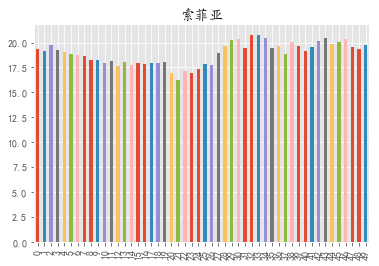

In [27]:
plt.style.use('ggplot')
#解决中文显示问题
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

df2.groupby('日期')['收盘价'].max().reset_index()
df2['收盘价'].sort_index().plot('bar', title=u'索菲亚')



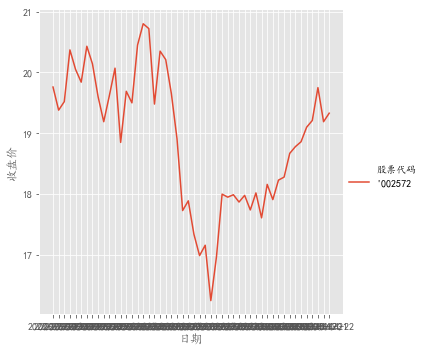

In [28]:
sns.relplot(x= "日期", y= "收盘价", hue= "股票代码", kind= "line", data=df2)

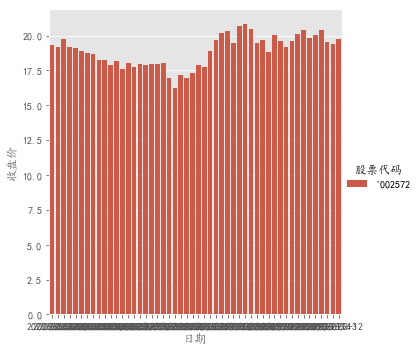

In [29]:
sns.catplot(x= u"日期", y= u"收盘价",hue= u"股票代码", kind= "bar", data=df2)

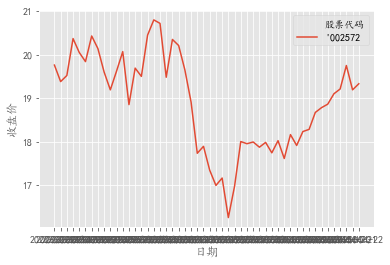

In [30]:
sns.lineplot(x=u"日期", y=u"收盘价",hue=u"股票代码", data=df2)


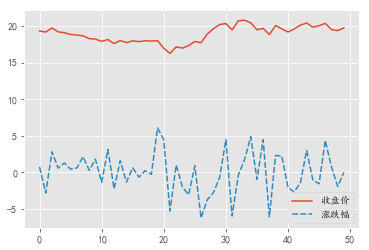

In [31]:
# 两条线在一个图上显示
list_data = [df2.loc[:, "收盘价"], df2.loc[:, "涨跌幅"]]

ax = sns.lineplot(data=list_data)

[Text(0,0,'2020-04-22'),
 Text(0,0,'2020-04-21'),
 Text(0,0,'2020-04-20'),
 Text(0,0,'2020-04-17'),
 Text(0,0,'2020-04-16'),
 Text(0,0,'2020-04-15'),
 Text(0,0,'2020-04-14'),
 Text(0,0,'2020-04-13'),
 Text(0,0,'2020-04-10'),
 Text(0,0,'2020-04-09'),
 Text(0,0,'2020-04-08'),
 Text(0,0,'2020-04-07'),
 Text(0,0,'2020-04-03'),
 Text(0,0,'2020-04-02'),
 Text(0,0,'2020-04-01'),
 Text(0,0,'2020-03-31'),
 Text(0,0,'2020-03-30'),
 Text(0,0,'2020-03-27'),
 Text(0,0,'2020-03-26'),
 Text(0,0,'2020-03-25'),
 Text(0,0,'2020-03-24'),
 Text(0,0,'2020-03-23'),
 Text(0,0,'2020-03-20'),
 Text(0,0,'2020-03-19'),
 Text(0,0,'2020-03-18'),
 Text(0,0,'2020-03-17'),
 Text(0,0,'2020-03-16'),
 Text(0,0,'2020-03-13'),
 Text(0,0,'2020-03-12'),
 Text(0,0,'2020-03-11'),
 Text(0,0,'2020-03-10'),
 Text(0,0,'2020-03-09'),
 Text(0,0,'2020-03-06'),
 Text(0,0,'2020-03-05'),
 Text(0,0,'2020-03-04'),
 Text(0,0,'2020-03-03'),
 Text(0,0,'2020-03-02'),
 Text(0,0,'2020-02-28'),
 Text(0,0,'2020-02-27'),
 Text(0,0,'2020-02-26'),


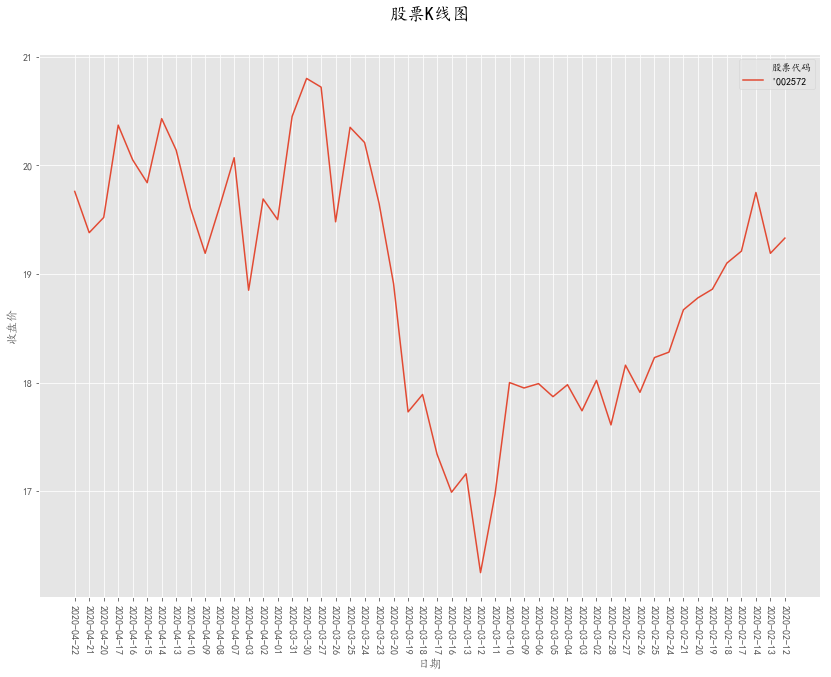

In [36]:
f, ax = plt.subplots(figsize = (14, 10))

# 设置颜色
cmap = sns.cubehelix_palette(start = 1, rot = 3, gamma=0.8, as_cmap = True)

# color: https://matplotlib.org/users/colormaps.html
sns.lineplot(x=u"日期", y=u"收盘价",hue=u"股票代码", data=df2, ax=ax)

ax.set_title('股票K线图', fontsize=18, position=(0.5,1.05))

#ax.tick_params(axis=u"日期",labelsize=6, colors='b', labeltop=False, labelbottom=False) 
ax.set_xticklabels(df2['日期'], rotation=-90)